In [208]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from keras import layers, Sequential, regularizers, callbacks
import matplotlib.pyplot as plt

1. Importation des données

In [209]:
data=pd.read_csv('Boston.csv', index_col=0)
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [210]:
print("Taille du dataset:", data.shape)

Taille du dataset: (506, 14)


Renommer les colonnes rend le dataset plus lisible

In [211]:
data = data.rename(columns={
    "crim": "taux_criminalité",
    "zn": "zone_résidentielle",
    "indus": "zone_industrielle",
    "chas": "rivière_Charles",
    "nox": "concentration_NO",
    "rm": "nb_moy_pieces",
    "age": "logements_anciens",
    "dis": "distance_emplois",
    "rad": "accès_autoroute",
    "tax": "taxe_foncière",
    "ptratio": "ratio_élèves_enseignant",
    "b": "indice_population_noire",
    "lstat": "pop_basse_revenu",
    "medv" : "prix"
})

2. Séparation des features et de la cible

In [212]:
X = data.drop(columns=["prix"])
y = data["prix"].values

3. Division des données en ensembles d'entraînement et de test

In [213]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

4. Normalisation des données (Standardisation)

In [214]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

5. Définition du modèle de réseau de neurones

In [215]:
def build_model():
    model = Sequential()
    model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(1, activation='relu'))

    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

6. Validation croisée

In [216]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
mae_scores = []
loss_scores=[]

- 100 epochs avec validation croisée

C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 11s 79ms/step - loss: 605.4895 - mae: 22.7031 - val_loss: 564.7538 - val_mae: 22.2229
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 521.1356 - mae: 20.8734 - val_loss: 395.8620 - val_mae: 18.1632
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 337.7725 - mae: 15.8494 - val_loss: 170.4395 - val_mae: 11.4192
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 147.9283 - mae: 9.5701 - val_loss: 71.2625 - val_mae: 6.1576
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 83.3093 - mae: 7.1909 - val_loss: 54.3039 - val_mae: 5.2343
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 48.0136 - mae: 5.3826 - val_loss: 38.9119 - val_mae: 4.5689
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 26.6974 - mae: 3.8607 - val_loss: 36.3022 - val_mae: 4.3036
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 23.0591 - mae: 3.5915 - val_loss: 32.2955 - val_mae: 4.0503
Epoch 9/100
11/11 ━━━━━━━━

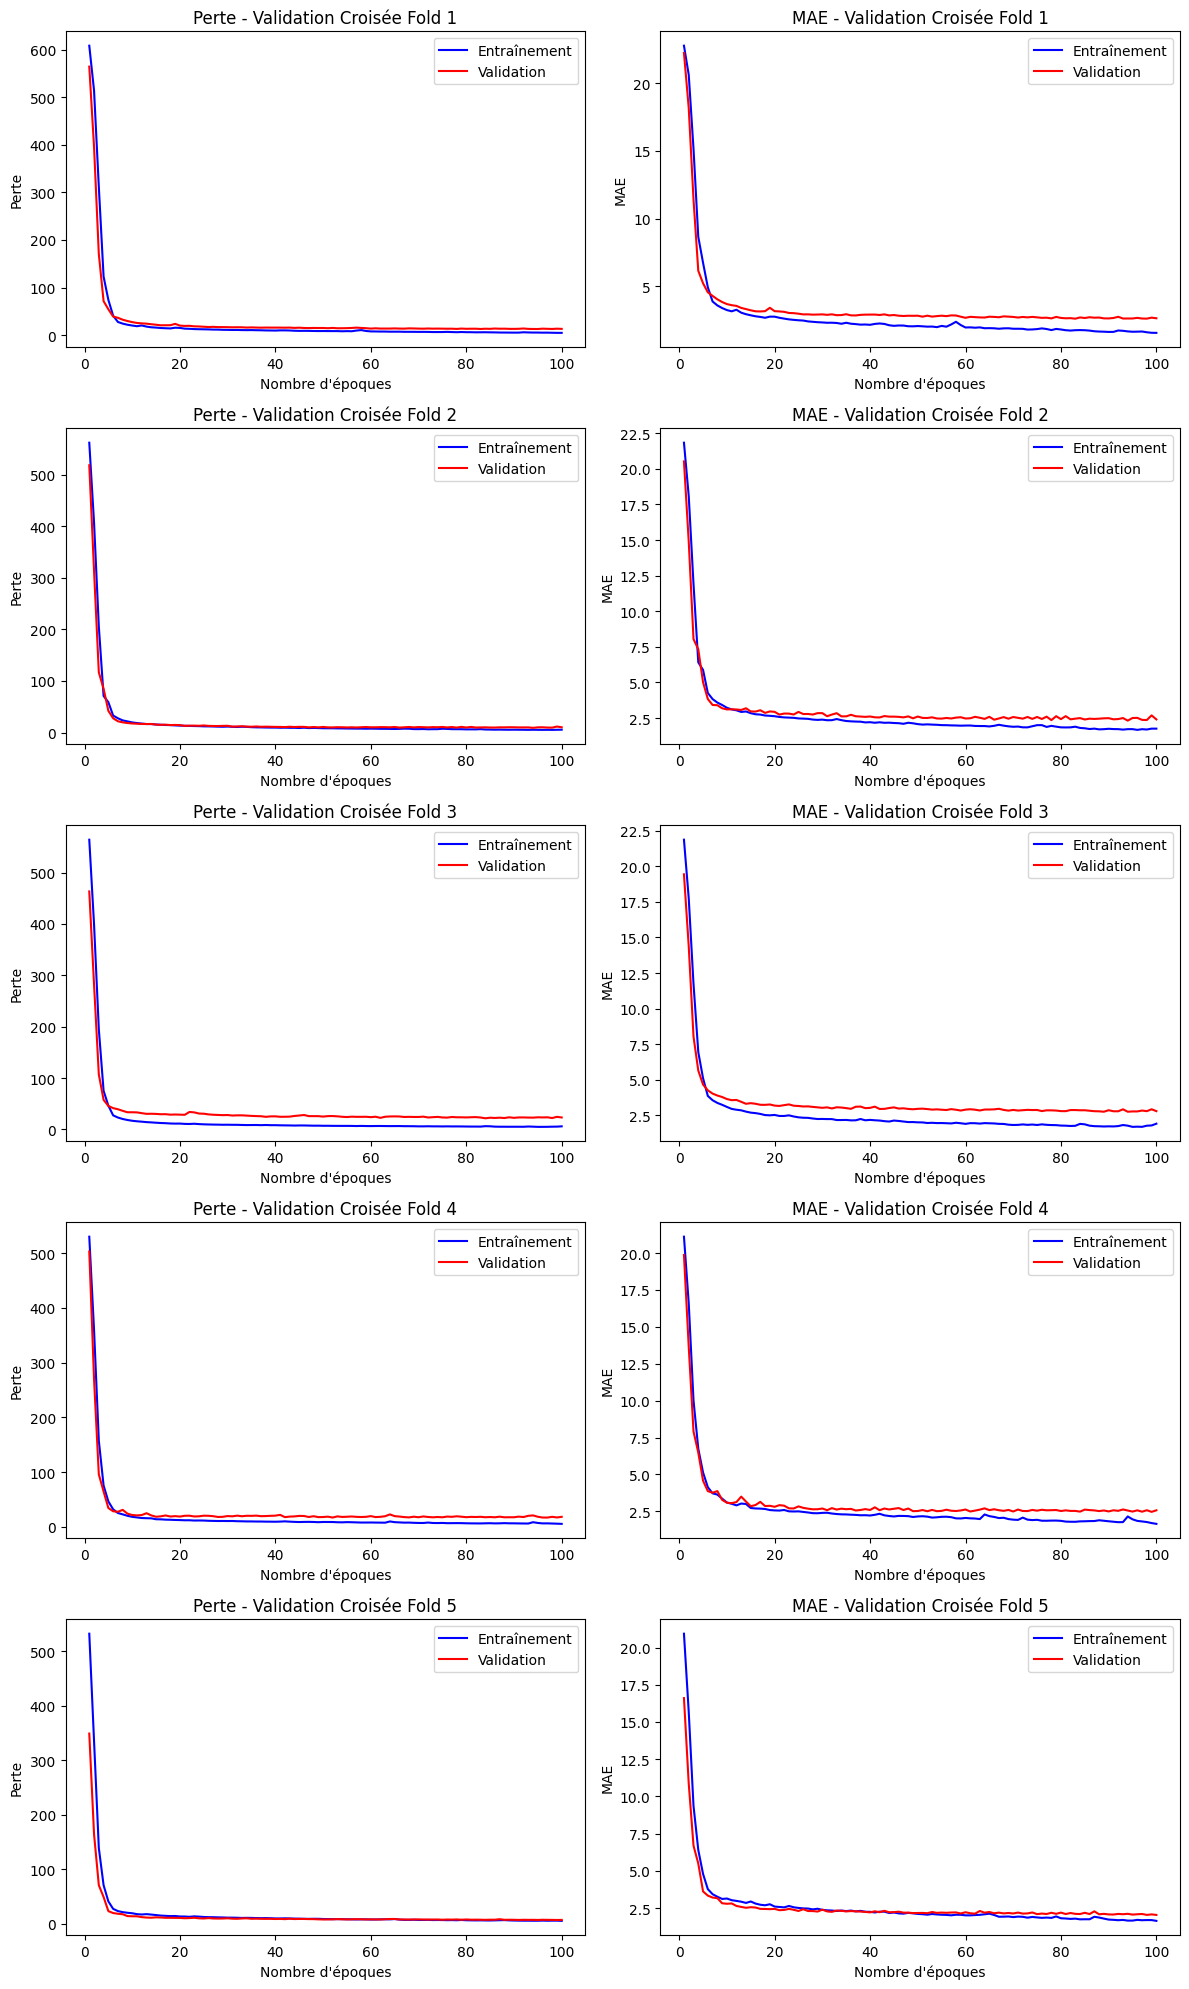

In [217]:
fold = 1
plt.figure(figsize=(12, 20))

for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    
    model = build_model()
    history = model.fit(X_train_fold, y_train_fold, epochs=100,  validation_data=(X_val_fold, y_val_fold))
    loss, mae = model.evaluate(X_val_fold, y_val_fold)
    loss_scores.append(loss)
    mae_scores.append(mae)
    
    history_dict = history.history
    epochs = range(1, len(history_dict['mae']) + 1)
    
    plt.subplot(5, 2, fold * 2 - 1)
    plt.plot(epochs, history_dict['loss'], 'b', label='Entraînement')
    plt.plot(epochs, history_dict['val_loss'], 'r', label='Validation')
    plt.title(f'Perte - Validation Croisée Fold {fold}')
    plt.xlabel("Nombre d'époques")
    plt.ylabel('Perte')
    plt.legend()
    
    plt.subplot(5, 2, fold * 2)
    plt.plot(epochs, history_dict['mae'], 'b', label='Entraînement')
    plt.plot(epochs, history_dict['val_mae'], 'r', label='Validation')
    plt.title(f'MAE - Validation Croisée Fold {fold}')
    plt.xlabel("Nombre d'époques")
    plt.ylabel('MAE')
    plt.legend()
    
    fold += 1

plt.tight_layout()
plt.show()

In [218]:
for i in range (len(mae_scores)):
    print(f"mae = {mae_scores[i]}, loss = {loss_scores[i]}")

mae = 2.654623031616211, loss = 12.985636711120605
mae = 2.404249668121338, loss = 10.11701488494873
mae = 2.8045973777770996, loss = 23.380596160888672
mae = 2.573158025741577, loss = 18.0902156829834
mae = 2.0477774143218994, loss = 6.794812202453613


- Avec 500 epochs

In [219]:
model = build_model()
history = model.fit(X_train, y_train, epochs=500, batch_size=64, validation_split=0.2)

Epoch 1/500


C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - loss: 598.4283 - mae: 22.5224 - val_loss: 494.3914 - val_mae: 20.6032
Epoch 2/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 519.5768 - mae: 20.7044 - val_loss: 417.2838 - val_mae: 18.6541
Epoch 3/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 439.1397 - mae: 18.5172 - val_loss: 322.8340 - val_mae: 16.0530
Epoch 4/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 336.3582 - mae: 15.9016 - val_loss: 216.0836 - val_mae: 12.8590
Epoch 5/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 221.0375 - mae: 12.5012 - val_loss: 116.3397 - val_mae: 8.9601
Epoch 6/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 130.0681 - mae: 9.2442 - val_loss: 52.7998 - val_mae: 5.3872
Epoch 7/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 74.6107 - mae: 6.8005 - val_loss: 39.7525 - val_mae: 4.6885
Epoch 8/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 68.6322 - mae: 6.4454 - val_loss: 38.0630 - val_mae: 4.6818
Epoch 9/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/ste

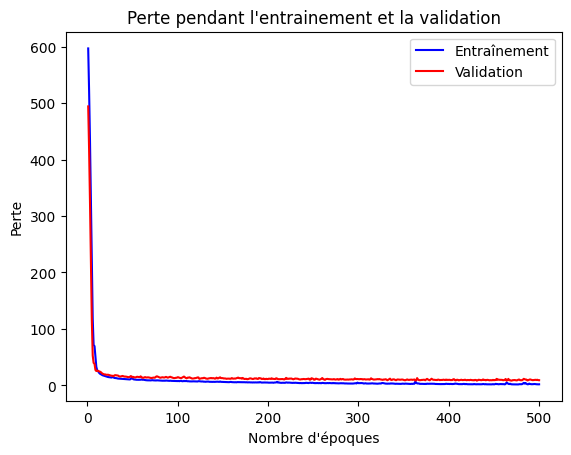

In [220]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['mae']) + 1)

plt.plot (epochs, loss_values, 'b', label='Entraînement')
plt.plot(epochs, val_loss_values, 'r', label='Validation')
plt.title('Perte pendant l\'entrainement et la validation')
plt.xlabel('Nombre d\'époques')
plt.ylabel('Perte')
plt.legend()
plt.show()

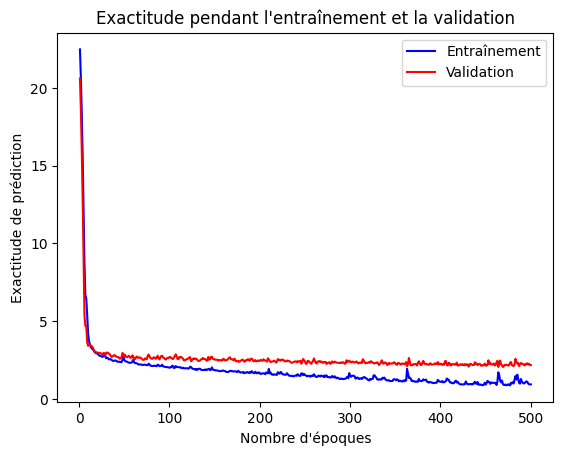

In [221]:
plt.clf()
acc_values = history_dict['mae']
val_acc_values = history_dict['val_mae']
plt.plot(epochs, acc_values, 'b', label= 'Entraînement')
plt.plot(epochs, val_acc_values, 'r', label='Validation')
plt.title('Exactitude pendant l\'entraînement et la validation')
plt.xlabel('Nombre d\'époques')
plt.ylabel('Exactitude de prédiction')
plt.legend()
plt.show()

In [222]:
results= model.evaluate(X_test, y_test)
results

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 9.8613 - mae: 2.2430


[12.51806926727295, 2.307406187057495]

In [223]:
y_pred=model.predict(X_test)
df_resultats = pd.DataFrame({'y_reel': y_test, 'y_pred': y_pred.flatten()})
print(df_resultats.head())

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
   y_reel     y_pred
0    23.6  28.472801
1    32.4  35.536137
2    13.6  16.138638
3    22.8  23.760866
4    16.1  16.728523


In [224]:
# Sauvegarder le modèle entraîné
model.save("model500.keras")

# Sauvegarder les résultats d'évaluation
np.save("evaluation_1.npy", results)

# Sauvegarder l'historique d'entraînement
import pickle
with open("history_1.pkl", "wb") as f:
    pickle.dump(history.history, f)

#Sauvegarder les prédictions
np.save("predictions_1.npy", y_pred)

print("Modèle et résultats sauvegardés avec succès.")

Modèle et résultats sauvegardés avec succès.


- Ajustement du modèle

In [225]:
model = Sequential([
        layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(X.shape[1],)),
        layers.Dropout(0.2),
        layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
        layers.Dropout(0.2),
        layers.Dense(1, activation="relu")
    ])
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [226]:
history = model.fit(X_train, y_train, epochs=500, batch_size=256, validation_split=0.2, verbose=1)

Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 832ms/step - loss: 614.9159 - mae: 22.8275 - val_loss: 533.0082 - val_mae: 21.4322
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 581.9948 - mae: 22.0458 - val_loss: 502.4198 - val_mae: 20.7093
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 552.5305 - mae: 21.3605 - val_loss: 471.3667 - val_mae: 19.9480
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 514.5591 - mae: 20.4599 - val_loss: 439.2079 - val_mae: 19.1287
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 4s/step - loss: 475.9575 - mae: 19.5357 - val_loss: 405.3858 - val_mae: 18.2308
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 453.0016 - mae: 18.8814 - val_loss: 369.6630 - val_mae: 17.2647
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 417.9327 - mae: 17.9722 - val_loss: 332.2727 - val_mae: 16.2405
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 368.9728 - mae: 16.7345 - val_loss: 293.5850 - val_mae: 15.1635
Epoch 9/500
2/2 ━━━━━━━━━

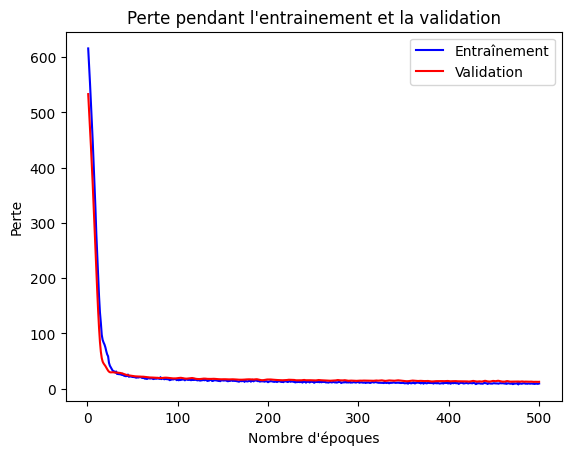

In [227]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['mae']) + 1)

plt.plot (epochs, loss_values, 'b', label='Entraînement')
plt.plot(epochs, val_loss_values, 'r', label='Validation')
plt.title('Perte pendant l\'entrainement et la validation')
plt.xlabel('Nombre d\'époques')
plt.ylabel('Perte')
plt.legend()
plt.show()

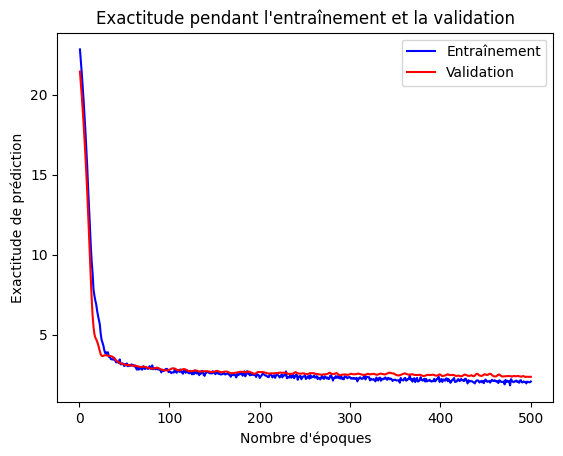

In [228]:
plt.clf()
acc_values = history_dict['mae']
val_acc_values = history_dict['val_mae']
plt.plot(epochs, acc_values, 'b', label= 'Entraînement')
plt.plot(epochs, val_acc_values, 'r', label='Validation')
plt.title('Exactitude pendant l\'entraînement et la validation')
plt.xlabel('Nombre d\'époques')
plt.ylabel('Exactitude de prédiction')
plt.legend()
plt.show()

In [229]:
results= model.evaluate(X_test, y_test)
results

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 10.8524 - mae: 2.1093


[13.174943923950195, 2.2382843494415283]

In [230]:
y_pred_ajuste=model.predict(X_test)
df_resultats = pd.DataFrame({'y_reel': y_test, 'y_pred': y_pred_ajuste.flatten()})
print(df_resultats.head())

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
   y_reel     y_pred
0    23.6  28.427572
1    32.4  35.064693
2    13.6  16.613087
3    22.8  24.055332
4    16.1  16.829723


In [234]:
# Sauvegarder le modèle entraîné
model.save("model500ajuste.keras")

# Sauvegarder les résultats d'évaluation
np.save("evaluation_2.npy", results)

# Sauvegarder l'historique d'entraînement
import pickle
with open("history_2.pkl", "wb") as f:
    pickle.dump(history.history, f)

#Sauvegarder les prédictions
np.save("predictions_2.npy", y_pred_ajuste)

np.save("y_test.npy", y_test)

print("Modèle et résultats sauvegardés avec succès.")

Modèle et résultats sauvegardés avec succès.


In [235]:
import joblib
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']